# Extract optimal hyperparameters ($C$, $\gamma$) with cross-validation tests.
Jupyter Notebook for analysing the results of the held-out tests  performed using the file `main_cv_single_real.py` (and optional `run_cv.sh`). 

We performed prediction tasks using cross-validation with 80-20 splits: we use 80% of the data for training the parameters and then measure AUC and accuracy on the remaining 20% test set. Specifically, for the network topology, we hold out 20% of the triples $(\alpha, i, j)$; for the attributes, we hold out 20% of the entries of the categorical vector.  
To improve performance, set `N_real` to a higher number (results were obtained with `N_real=1`). This will slow down the algorithm, but will find a solution with higher loglikelihood (in the training).


In [22]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# import results of cross-validation procedure
df = pd.read_csv('../data/output/5-fold_cv/adj_results.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (45, 10)


,C,gamma,fold,rseed,logL,acc_train,auc_train,logL_test,acc_test,auc_test
0,2,0.3,0,107261,-11651.372,0.754167,0.781423,-2943.445578,0.750000,0.745423
1,2,0.3,1,107262,-11819.517,0.758333,0.781323,-2778.026148,0.750000,0.741167
2,2,0.3,2,107263,-11851.797,0.770833,0.775263,-2839.125554,0.700000,0.744381
3,2,0.3,3,107264,-11806.609,0.745833,0.780124,-2820.854597,0.783333,0.760038
4,2,0.3,4,107265,-11693.336,0.754167,0.781428,-2862.833337,0.750000,0.754834


In [24]:
# group the results for each pair of (C, gamma), and consider the mean over the K-folds 
groups = df.groupby(by=['C','gamma'])
groups.mean().iloc[:, 2:]

logL  acc_train  auc_train    logL_test  acc_test  auc_test
C gamma                                                                   
2 0.3   -11764.5262   0.756667   0.779912 -2848.857043  0.746667  0.749169
  0.5    -8475.1250   0.754167   0.775542 -2063.974595  0.743333  0.743899
  0.7    -5381.0418   0.692500   0.701420 -1340.051501  0.530000  0.665423
5 0.3   -11232.3572   0.775833   0.835923 -2870.888724  0.693333  0.709993
  0.5    -8074.1944   0.799167   0.830755 -2034.522467  0.716667  0.721670
  0.7    -4905.8972   0.850833   0.820216 -1215.587331  0.713333  0.721202
8 0.3   -10924.5182   0.765833   0.858745 -2946.419955  0.706667  0.689207
  0.5    -7892.3618   0.790000   0.852286 -2038.638973  0.730000  0.699279
  0.7    -4775.3138   0.885833   0.848740 -1201.320993  0.653333  0.701805

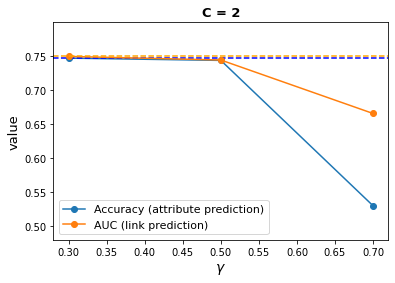

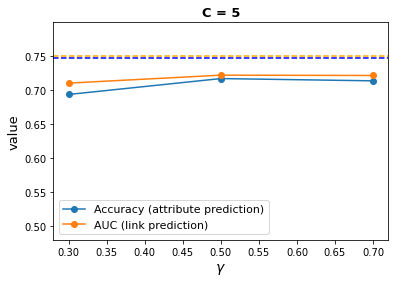

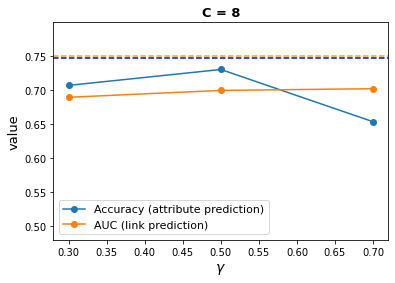

In [25]:
# plot the results (accuracy and auc of the test set) for each number of communities C
label_legend = {'acc_test': 'Accuracy (attribute prediction)', 'auc_test':'AUC (link prediction)'}
colors = {'acc_test':'blue','auc_test':'orange'}
mins = min(np.min(groups.mean()['acc_test']), np.min(groups.mean()['auc_test']))
maxs = max(np.max(groups.mean()['acc_test']), np.max(groups.mean()['auc_test']))

for C in np.unique(df.C):
    fig = plt.figure()
    for measure in ['acc_test', 'auc_test']:
        x = np.unique(df.gamma)
        y = groups.mean().loc[C][measure]
        plt.plot(x, y, marker='o', label=label_legend[measure])
        plt.axhline(y = np.max(groups.mean()[measure]), color=colors[measure], linestyle='--')      
    
    plt.title('C = {0}'.format(C), fontweight="bold", size=13)
    plt.xlabel('$\gamma$', size = 14)
    plt.ylim([mins-.05, maxs+.05])
    plt.ylabel('value', size = 13)
    plt.legend(loc='lower left', fontsize=11)

Our model has two hyperparameters, the scaling parameter $\gamma$ and the number of communities $C$. We estimate them by using 5-fold cross-validation along with grid search to range across their possible values. We then select the combination $(\hat{C},\hat{\gamma})$ that returns the best average performance over the cross-validation runs. Standard cross-validation considers performance in terms of a particular metric. However, here we have two possible ones which are qualitatively different, i.e. AUC and accuracy. Depending on the task at hand, one can define performance as a combination of the two, bearing in mind that the values of $(\hat{C},\hat{\gamma})$ at the maximum of either of them might not coincide. Here we would select $(\hat{C},\hat{\gamma})$ as the values are jointly closer to both the maximum values (dashed lines).

The hyperparameters selection would benefit from an automatized routine, to be incorporated as a pre-step in the main algorithm.